# Project 4: Communication: RS-232, i2c, SPI. Null Hypothesis Significance Testing (NHST).
## Abstract
In this lab, we were to control the Arduino over the serial port to measure room temperature when it was high and low. We used an $i^2c$ based peripheral, SparkFun MAX30105 Particle Sensor, to measure the temperature. We measured the temperature when it was normal and when it was higher than normal. We made it higher than normal by turning on a gas cooker and measuring the temperature within that space. We were also meant to determine that we know the sensor was actually working by doing a hypothesis testing. The p-value gotten from the hypothesis testing when compared to a value, 13, really lower than the mean which was 37.74 difference between high and low temperature was 0.002. This means that the measured difference is statistically significant. The sensor is accurate to $\pm$ 1C. 
## Description
$i^2c$ is a serial protocol for two-wire interface to connect low-speed devices like microcontrollers, EEPROMs, A/D and D/A converters, I/O interfaces and other similar peripherals in embedded systems. We used the microcontroller, Arduino, to communicate with the MAX30105 Particle sensor and relay the data to the computer.
The SparkFun MAX30105 Particle Sensor is a flexible and powerful sensor enabling sensing of distance, heart rate, particle detection, even the blinking of an eye. And in this lab, we used the sensor to measure temperature of the room temperature.
## Schematic Background and Discussion
To measure the temperature with the sensor, we had to build a circuit on the arduino. The circuit diagram built is shown in the figure below:

![Fritzing_Hookup.jpg](Fritzing_Hookup.jpg)

The GND/5V/SDA/SCL pin-out is the standard $i^2c$ connection on most of sparkfun products. This allows you to easily connect $i^2c$ boards. 

![I2C_Pins_MAX30105.jpg](I2C_Pins_MAX30105.jpg)

The INT	is an output pin for Interrupt, active low the GND pin is a	supply input for Ground (0V) supply. The 5V pin out is a supply input for power supply. The SDA is bi-directional, it is a $i^2c$ bus clock line. The SCL is an input pin, it is a	$i^2c$ bus clock line.

After building the circuit, we write an Arduino C code to compile and verify the temperature data. The purpose of this lab was to be able to let the computer communicate with the arduino, so we have to write a Python code on the computer to read the data from the arduino and store it.

We stored this data on a csv file and carried out the data analysis and hypothesis testing to confirm if the sensor was actually measuring temperature by evaluating the p-value.

## Circuit Function, including code + data
We programmed the Arduino with the following "C" program:

    {
      Serial.begin(9600);
      Serial.println("Hello");  // tell the computer we're ready
      if (particleSensor.begin(Wire, I2C_SPEED_FAST) == false) 
      {
        Serial.println("MAX30105 was not found. Please check wiring/power. ");
        while (1);
      }

      //The LEDs are very low power and won't affect the temp reading much but
      //you may want to turn off the LEDs to avoid any local heating
      particleSensor.setup(0); //Configure sensor. Turn off LEDs
      //particleSensor.setup(); //Configure sensor. Use 25mA for LED drive

      particleSensor.enableDIETEMPRDY(); //Enable the temp ready interrupt. This is required.
      Serial.println("Temperature (in K),");
    }

    void loop()
    {
    char command;
      if (Serial.available()>0) {          // are there characters to read?
        command = (char)Serial.read();     // grab one
        if (command=='g') {                // check it
          for(int i = 0; i<120; i++){
            float temperature = particleSensor.readTemperature(); //Returns the temperature of the IC in C
            Serial.print(temperature + 273.15, 4);
            //Serial.print("K");
            Serial.println(",");
            delay(1000);
          }
        }
      Serial.println("End");  
      while(0);
      }
    }

The python code we used to communicate with the arduino, read and store data is shown below:

    import serial

    port = serial.Serial('COM4')                        # open the serial port (WIN)

    print("Waiting for conversation...")

    s = port.readline().strip()             # read a line of input from the Arduino

    print ("got ",str(s))                   # echo to screen

    while s != b'Hello':                    # check for "Hello"
        s = port.readline().strip()         # not yet, try again
        print ("got ",str(s))

    port.write(b'g')                        # send a command

    s = port.readline().strip()             # get a reply

    indexes = []

    while s[:3] != b'End':                  # is it the end?
        print(str(s))                       # nope, echo, repeat
        data = s.decode()
        if ',' in data:
            index,value = data.split(',')
            indexes.append(index)
        s = port.readline().strip()

    print ("Finally got:", str(s))          # that's it!
    print ("Finished!")

    port.close()                            # shut it down
     #OYA

## Data

In [22]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as pl 
import numpy as np
db = pd.read_csv('Output.csv')
db

,Time,Temperature
0,1,296.6500
1,2,296.7125
2,3,296.6500
3,4,296.7125
4,5,296.6500
...,...,...
115,116,325.0875
116,117,324.7750
117,118,324.3375
118,119,323.4625


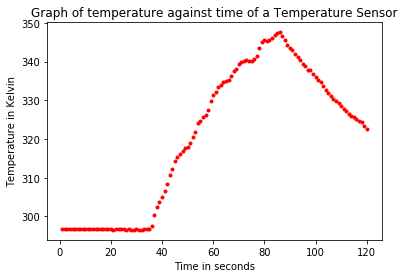

In [23]:
pl.title("Graph of temperature against time of a Temperature Sensor")
pl.xlabel("Time in seconds")
pl.ylabel("Temperature in Kelvin")
pl.plot(db.Time, db.Temperature, 'r.')

We measured temeperature over 2 minutes. We started with measuring normal room temperature, then we measured the temepreature near an electric cooker that was turned on. We did this by moving the sensor close to the cooker. You can notice the constant temperature, then a hike in temperature, then a gradual decrease. All these are as a result of change in temperature conditions. This shows that the sensor was actually measuring temperature, but we are not totally show. That is why we were made to carry out hypothesis testing. We took a slice of normal room temperature and a slice of higher temperatures. We calculated the mean of each slice and found the mean difference. We know put these slices into one array and shuffles the array. Took out equal amounts of temperature data sets for two different arrays, evaluated the mean of each array and calculated the difference in means. We compared this to the original set of arrays by finding the p value. if the p value was above 5%, then data is statistically insignificant. This means it is not totally convincing that the sensor was measuring data temperature based on heat conditions. But if it is less than 5% we can say the sensor actually measured temperature over different heat conditions

Difference in original mean:  37.74062500000002


Text(0.5, 1.0, 'mean differences of shuffled data')

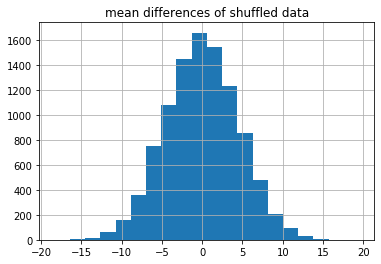

In [24]:
N = 10000
mean_diff = []
t1 = db.Temperature[0:40]
t2 = db.Temperature[47:87]
t = np.append(t1,t2)
t1_mean = t1.mean()
t2_mean = t2.mean()
diff = t2_mean - t1_mean
print ("Difference in original mean: ", diff)

for i in range(N):
    np.random.shuffle(t)                # stir the pot
    t1mean_test = np.mean(t[:len(t1)]) # get mean of the first lot, like the original x1
    t2mean_test = np.mean(t[len(t1):]) # get the mean of the second lot, like the original x2
    mean_diff.append(t2mean_test - t1mean_test) # compute the difference of means and collect
    
mean_diff = np.array(mean_diff)  # convert to numpy array
pl.hist(mean_diff,20)
pl.grid()
pl.title("mean differences of shuffled data") 

In [28]:
p_val = (mean_diff >= 13).sum()/N
p_val

0.002

When we evaluate the mean difference of the first data sets and compared it to the mean difference of the shuffled data, we got a p value of 0. Meaning the probability that an extreme mean difference result would arise by chance is zero. I dialled down the mean to 13 and found out the p value was 0.002. 

## Conclusion
In this lab, we tried to make the computer communicate with an arduino circuit that was built to measure temperature using the $i^2c$ based peripheral. We wrote a python program that'll communicate with the arduino, read, and store temperature data values. We decided to confirm if these values were legit by carrying out hypothesis testing. We figured out that if the compared mean difference of actual data and various mean differences of shuffled data, we got a p-vale of 0.0, meaning statistically there was significant difference. We had to dial down the mean difference of the actual data to get a p-value we could use for analysis. We had a p value of 0.002 after this was done.

## Statistical Analysis

0.1288

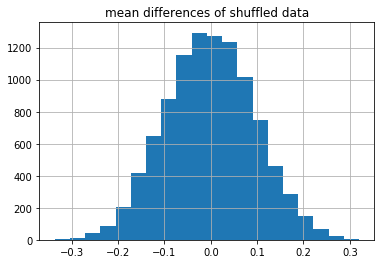

In [15]:
x1 = np.array([3.25466863, 2.97370402, 2.91113498, 3.4574893 , 3.17937048,
       3.03048094, 3.21812428, 2.81350504, 2.9976349 , 2.97788408,
       3.1813029 , 2.87498481, 2.90372449, 3.46095383, 3.11570786,
       2.69100383, 2.97142051, 2.72968174, 2.48244642, 2.8584929 ])
x2 = np.array([3.58365047, 3.04506491, 3.35190893, 2.76485786, 3.8494015 ,
       3.17593123, 3.03499338, 2.31533078, 2.58647626, 3.47397813,
       2.9985396 , 3.46170964, 3.23908075, 2.78904992, 3.000179  ,
       3.23386923, 3.10856455, 3.24167989, 2.92353227, 3.09131427])
iters = 10000
all_data = np.append(x1, x2)  # put all the data in one pot
mean_diffs = []
for i in range(iters):
    np.random.shuffle(all_data)                # stir the pot
    x1_mean_test = np.mean(all_data[:len(x1)]) # get mean of the first lot, like the original x1
    x2_mean_test = np.mean(all_data[len(x1):]) # get the mean of the second lot, like the original x2
    mean_diffs.append(x2_mean_test - x1_mean_test) # compute the difference of means and collect
    
mean_diffs = np.array(mean_diffs)  # convert to numpy array
pl.hist(mean_diffs,20)
pl.grid()
pl.title("mean differences of shuffled data")
p_value = (mean_diffs >= 0.109).sum()/iters
p_value

P value is way above 0.05, therefore, there is no statistically significant difference.